In [1]:
# @title
from google.colab import files

# Upload file(s)
uploaded = files.upload()


Saving uuii.jpg to uuii.jpg


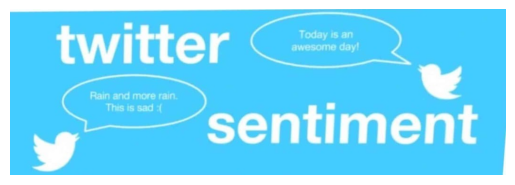

In [2]:
# @title
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/uuii.jpg")  # Replace with your file name
plt.imshow(img)
plt.axis('off')
plt.show()

## **Problem Statement**
The goal is to build a binary sentiment analysis model that classifies tweets as positive or negative using the Sentiment140 dataset and deep learning (LSTM).

## **Importing dataset**
The dataset being used is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.

## It contains the following 6 fields:

sentiment: the polarity of the tweet (0 = negative, 4 = positive)

ids: The id of the tweet (2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

We require only the sentiment and text fields, so we discard the rest.

Furthermore, we're changing the sentiment field so that it has new values to reflect the sentiment. (0 = Negative, 1 = Positive)

## Goal
We have to categorize the text as positive, negative or neutral.

TO execute the task we would be using Natural Language Processing(NLP) to draw sentiment from the texts and categorize them.

# Objective:¶
The primary objective of this notebook is to develop an efficient binary classification model that can categorize tweets into positive or negative sentiments. The specific goals include:

# Data Preprocessing:
Text cleaning: Removed URLs, mentions, hashtags, special characters, and extra spaces.

Lowercased all tweets for normalization.

Tokenization using Keras Tokenizer.

Padding sequences to a fixed length (e.g., 100 words).

Used pre-trained GloVe embeddings for semantic representation of words.
# Feature Engineering:
Transform the text data into numerical representations suitable for input into the LSTM model.

# Model Building:

1. CNN Model
Stacked Conv1D layers for feature extraction.

MaxPooling, Dropout, and Dense layers for classification.

Performed well with validation accuracy around 81.7%.

F1-score ~ 0.82

2. LSTM Model
Used an LSTM layer after the embedding layer for sequential understanding.

Showed consistently lower validation loss than CNN.

Final test accuracy: ~82%, F1-score: 0.82

Chosen as final model due to better generalization.
Construct and train both cnn and an LSTM model optimized for text data to perform the binary classification task.

# Evaluation:
Assess the model's performance using appropriate metrics such as accuracy,
precision, recall, and F1-score. and Training vs Validation Curves
Used classification_report() and confusion_matrix() from sklearn and find the best model

# Model Saving & Prediction
Final LSTM model saved as: lstm_sentiment_model.keras

Used for predictions on new, unseen tweets.

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download  -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other


In [5]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [6]:
!pip install pandas numpy matplotlib seaborn tensorflow nltk

# **Step 1: Import Required Libraries**
These are the libraries you'll use for data handling, preprocessing, visualization, and deep learning.

In [7]:
import pandas as pd                                                 # pandas and numpy for data handling
import numpy as np
import re                                                           #Imports regular expressions for text preprocessing (e.g., cleaning text)
import nltk                                                           # Imports the Natural Language Toolkit for text processing
import matplotlib.pyplot as plt                                       # matplotlib, seaborn for visualizations
import seaborn as sns

from nltk.corpus import stopwords                                       # Imports the list of stopwords (common words to exclude in NLP)
nltk.download('stopwords')                                             #nltk for text processing
from nltk.tokenize import word_tokenize                                # Function to split text into words (tokens)
from sklearn.model_selection import train_test_split                   #sklearn for splitting and evaluation
from sklearn.metrics import classification_report                      # Generates a text report showing precision, recall, f1-score

from tensorflow.keras.preprocessing.text import Tokenizer                                             #tensorflow.keras for building the deep learning model
from tensorflow.keras.preprocessing.sequence import pad_sequences                                       # Used tokennizer  to vectorize a text corpus by turning text into sequences of integers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dropout
# Imports various neural network layers:
# Dense - fully connected layer,
# Embedding - turns positive integers (indexes) into dense vectors of fixed size,
# Conv1D - 1D convolution layer (for text data),
# GlobalMaxPooling1D - reduces the output from Conv1D to a fixed size,
# LSTM - Long Short-Term Memory layer (RNN for sequence data),
# Dropout - helps prevent overfitting by randomly turning off neurons during training
nltk.download('stopwords')
from sklearn.metrics import classification_report, accuracy_score                       # accuracy_score - evaluates accuracy between true and predicted labels

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import warnings
warnings.filterwarnings('ignore')

# **Step 2: Load and Clean the Dataset**

In [9]:
# Adjust path as needed
df= pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [10]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",
                 encoding='latin-1',
                 header=None,
                 names=["sentiment", "ids", "date", "query", "user", "text"])

In [12]:
df.head()

,sentiment,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
df['sentiment'].value_counts()

,count
sentiment,
0,800000
4,800000


In [14]:
# Keep only positive (4) and negative (0) sentiment
df = df[df['sentiment'].isin([0, 4])]
df['sentiment'] = df['sentiment'].replace({0: 0, 4: 1})  # Map 0 = negative, 1 = positive
df = df[['sentiment', 'text']]  # Keep relevant columns

In [15]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [16]:
df['sentiment'].value_counts()

,count
sentiment,
0,800000
1,800000


In [17]:
# Check for missing values
print(df.isnull().sum())

sentiment    0
text         0
dtype: int64


In [18]:
print(df.duplicated().sum())

16309


In [19]:
df = df.drop_duplicates()

# **Step 3: EDA**

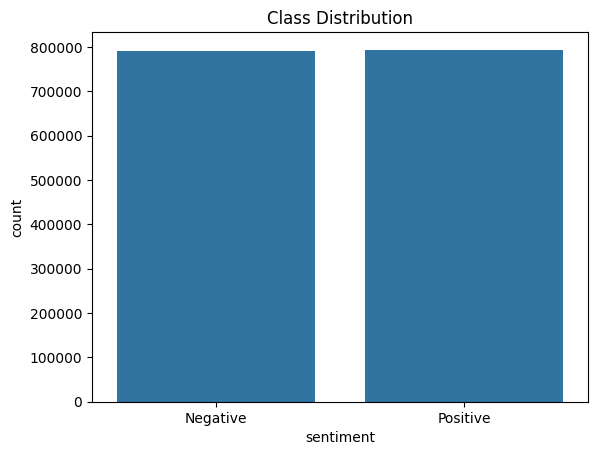

,count
sentiment,
1,793506
0,790185


In [20]:
sns.countplot(x='sentiment', data=df)
plt.title("Class Distribution")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

df['sentiment'].value_counts()

In [21]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

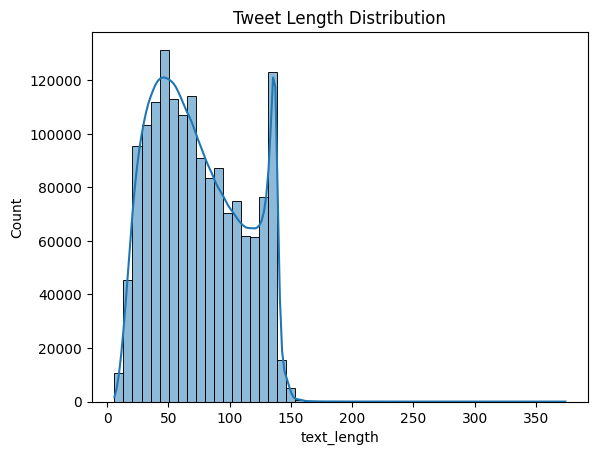

In [22]:
#Tweet Length Distribution
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.show()

# **Step 3: Text Cleaning**

In [23]:
def clean_text(text):
    text = text.lower()                             # Lowercase the text
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)      # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)           # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)         # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()        # Remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [24]:
df.head()

,sentiment,text,text_length,clean_text
0,1,redoinq the myspace,20,redoinq the myspace
1,1,Listening to lines vines &amp; trying times i...,61,listening to lines vines amp trying times its ...
2,0,buxie wid mah assignment .,27,buxie wid mah assignment
3,0,This is going to be a sad day...Happy Birthday...,62,this is going to be a sad dayhappy birthday he...
4,0,Jempol Megan Fox tidak sempurna she's human a...,82,jempol megan fox tidak sempurna shes human aft...


In [25]:
print(df['clean_text'].apply(len).max())
print(df['text'].apply(len).max())

177
374


Explanation:


*   This function standardizes tweets by removing noise (links, symbols, punctuation).
*    Helps the model focus on actual words.


# WordCloud for Positive and Negative Tweets

# **Analysing the data**
Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

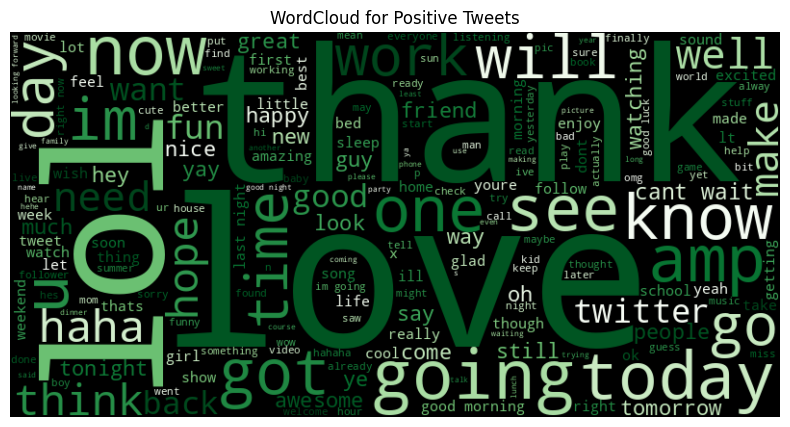

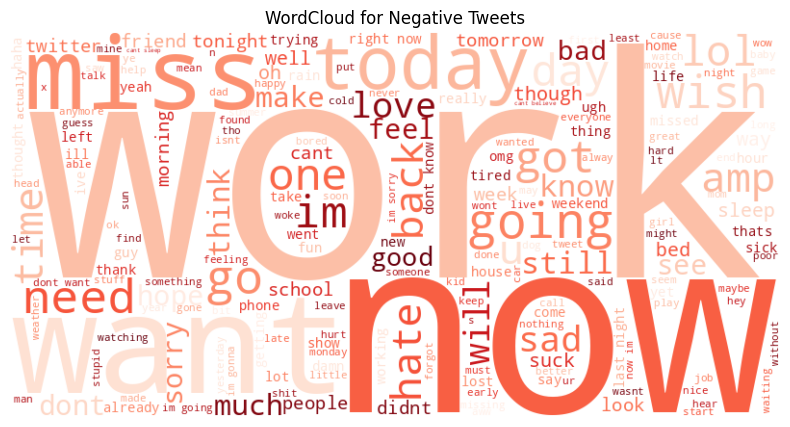

In [26]:
from wordcloud import WordCloud

# Separate positive and negative tweets
positive_tweets = df[df['sentiment'] == 1]['clean_text']                                      #Filters tweets labeled as positive (sentiment = 1)
negative_tweets = df[df['sentiment'] == 0]['clean_text']                                      #Filters tweets labeled as positive (sentiment = 0)

# Generate word clouds
positive_words = ' '.join(positive_tweets)                                                     # join  all positive tweets into a single string for word cloud input
negative_words = ' '.join(negative_tweets)                                                     # join  all positive tweets into a single string for word cloud input


# Positive WordCloud
positive_wc = WordCloud(width=800, height=400, background_color='Black', colormap='Greens').generate(positive_words)                               # generate(): builds the word cloud from the input string
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')                                           #  Renders the word cloud with smoother edges using interpolation
plt.axis('off')
plt.title("WordCloud for Positive Tweets")
plt.show()



# Negative WordCloud
negative_wc = WordCloud(width=800, height=400, background_color='White', colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Negative Tweets")
plt.show()

## Explanation:
WordCloud visualizes the most frequent words in each sentiment class.

colormap='Greens' and 'Reds' help visually distinguish between positive and negative tweets.

We join all tweets in each category and pass them into WordCloud.


In [27]:
df.nunique()

,0
sentiment,2
text,1581466
text_length,257
clean_text,1517346


Min length: 0
Max length: 40
Mean length: 12.417892126683803
95th percentile: 24.0


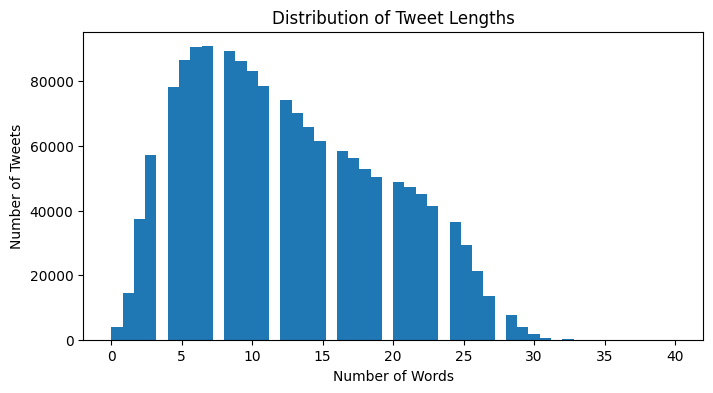

In [28]:
# Number of words per tweet (after cleaning)
tweet_lengths = df['clean_text'].apply(lambda x: len(x.split()))

print("Min length:", tweet_lengths.min())
print("Max length:", tweet_lengths.max())
print("Mean length:", tweet_lengths.mean())
print("95th percentile:", tweet_lengths.quantile(0.95))

# Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(tweet_lengths, bins=50)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Tweets")
plt.show()

In [29]:
MAX_VOCAB = 10000                                                  # Sets the maximum number of unique words (vocabulary size) to keep based on frequency
MAX_LEN = 50                                                       #  Defines the fixed length for each input sequence (tweets will be padded/truncated to this length)

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")      # Initializes a tokenizer:
                                                               # - num_words: keeps only the top 10,000 most frequent words
                                                               # - oov_token: assigns a special token ("<OOV>") for any word not in the vocabulary
tokenizer.fit_on_texts(df['clean_text'])                      # Builds the word index by learning the vocabulary from the cleaned text data

sequences = tokenizer.texts_to_sequences(df['clean_text'])           # Converts each tweet into a list of integers (each word is replaced with its corresponding index)
padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

X = padded
y = df['sentiment'].values

## Explanation:

Tokenizer: converts text to integers (word indices).

pad_sequences: ensures all sequences are the same length (required for LSTM).

MAX_LEN: 50 is a reasonable length for tweets.



# **Step 5: Split into Train and Test Sets**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Explanation:

80% for training, 20% for testing.

random_state=42 ensures reproducibility.

# **Step 6: Build CNN Model with Stacked Conv1D**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

#Define a 1D CNN model using the Sequential API
cnn_model = Sequential([
    Embedding(input_dim=MAX_VOCACB, output_dim=128, input_length=MAX_LEN),

    Conv1D(128, 5, activation='relu'),  # First Conv1D layer
    Conv1D(64, 3, activation='relu'),   # Second Conv1D layer

    GlobalMaxPooling1D(),                                                          # Reduces the output of convolution layers to a 1D vector by taking the maximum value across time steps

    Dense(64, activation='relu'),                                                  # Fully connected hidden layer with 64 units for learning higher-level representations
    Dropout(0.5),                                                                  # Dropout for regularization: randomly drops 50% of units during training to prevent overfitting
    Dense(1, activation='sigmoid')                                                 #   Output layer for binary classification: # - 1 neuron with sigmoid activation gives output between 0 and 1 (probability of positive sentiment)
])

])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   #loss: binary crossentropy is appropriate for binary classification #  optimizer: Adam is a fast and efficient optimizer # - metrics: we track accuracy during training/validation
cnn_model.build(input_shape=(None, MAX_LEN))
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 46, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 44, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,390,913 (5.31 MB)

 Trainable params: 1,390,913 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

# **Step 7: Compile the Model**

In [38]:
cnn_history = cnn_model.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.2,callbacks=[early_stop]
)


Epoch 1/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 846s 106ms/step - accuracy: 0.7791 - loss: 0.4638 - val_accuracy: 0.8162 - val_loss: 0.4035
Epoch 2/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 857s 106ms/step - accuracy: 0.8248 - loss: 0.3921 - val_accuracy: 0.8191 - val_loss: 0.3967
Epoch 3/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 872s 107ms/step - accuracy: 0.8388 - loss: 0.3646 - val_accuracy: 0.8199 - val_loss: 0.4015
Epoch 4/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 854s 106ms/step - accuracy: 0.8542 - loss: 0.3352 - val_accuracy: 0.8178 - val_loss: 0.4045


 Early stopping: Prevents overfitting by stopping training early when the model's validation loss stops improving.

restore_best_weights=True: Ensures the model retains the best-performing weights based on validation loss.

In [50]:
from sklearn.metrics import accuracy_score, classification_report

pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")
# Generates predictions on the test set:
# - cnn_model.predict(X_test) returns probabilities between 0 and 1
# - > 0.5 threshold: classifies probabilities as 1 (positive) or 0 (negative)
# - .astype("int32"): converts Boolean results to integers (0 or 1)

print("Test Accuracy (CNN):", accuracy_score(y_test, pred_cnn))
print(classification_report(y_test, pred_cnn))

9899/9899 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step
Test Accuracy (CNN): 0.8178942283709931
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    158037
           1       0.83      0.80      0.81    158702

    accuracy                           0.82    316739
   macro avg       0.82      0.82      0.82    316739
weighted avg       0.82      0.82      0.82    316739



# The model is well-balanced between both classes.

It’s slightly better at detecting positive tweets (Class 1) in terms of precision.

Very strong general performance on a large test set (316K tweets) — nice work!



In [43]:
from sklearn.metrics import  confusion_matrix

In [44]:
# 5. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_cnn ))


Confusion Matrix:
[[132700  25337]
 [ 32343 126359]]


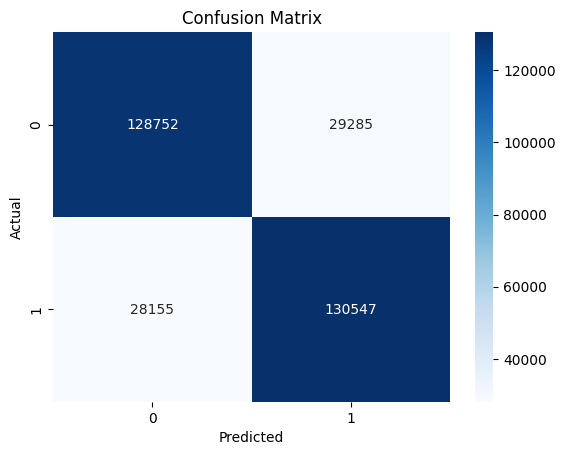

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_cnn)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

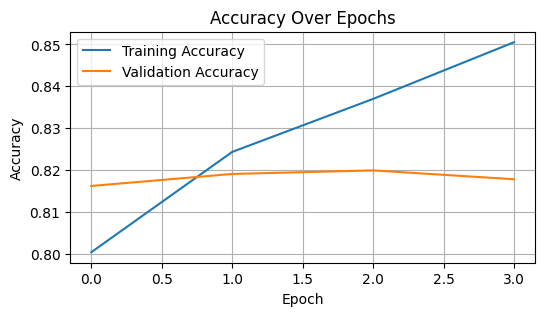

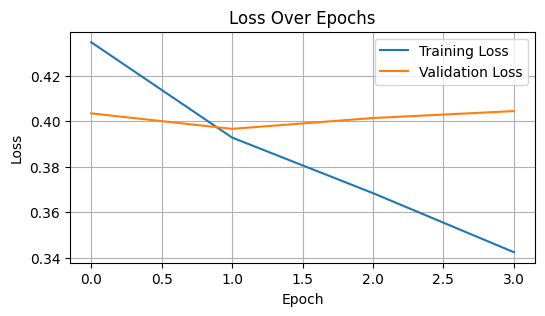

In [45]:
import matplotlib.pyplot as plt

# Accuracy Curve
plt.figure(figsize=(6,3))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curve
plt.figure(figsize=(6, 3))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Observation:

Training accuracy is increasing.

Validation accuracy is almost flat, slightly increasing and then staying constant.

and

Training loss is going down — good sign.

Validation loss is slightly going up — another sign of overfitting.

The model is learning the training data well, but is not getting better on new data. This means it might be starting to memorize instead of generalizing —

# **Step 8: Build the LSTM Model**

In [46]:
# Define the model
lstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),  # You can set return_sequences=True if stacking more layers
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Model summary
lstm_model.build(input_shape=(None, MAX_LEN))
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

# **Step : Compile the Model**

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1546s 195ms/step - accuracy: 0.4999 - loss: 0.6934 - val_accuracy: 0.4986 - val_loss: 0.6932
Epoch 2/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1581s 200ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6932
Epoch 3/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1519s 192ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6932
Epoch 4/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1538s 194ms/step - accuracy: 0.5264 - loss: 0.6722 - val_accuracy: 0.8068 - val_loss: 0.4195
Epoch 5/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1595s 196ms/step - accuracy: 0.8117 - loss: 0.4119 - val_accuracy: 0.8177 - val_loss: 0.4009
Epoch 6/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1542s 195ms/step - accuracy: 0.8268 - loss: 0.3841 - val_accuracy: 0.8226 - val_loss: 0.3926
Epoch 7/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1543s 190ms/step - accuracy: 0.8370 - loss: 0.3642 - val_accuracy: 0.8212 - val_loss: 0.3980
Epoch 8/10
7919/7919 ━━━━━━━━━━━━━━━━━━━━ 1561s 197ms/s

In [48]:

# 1. Predict probabilities
y_pred_probs = lstm_model.predict(X_test)

# 2. Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

9899/9899 ━━━━━━━━━━━━━━━━━━━━ 260s 26ms/step


In [51]:
# 3. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# 4. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8204988965678366

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82    158037
           1       0.82      0.82      0.82    158702

    accuracy                           0.82    316739
   macro avg       0.82      0.82      0.82    316739
weighted avg       0.82      0.82      0.82    316739



Balanced dataset:  precision, recall, and F1-scores are almost identical for both classes — a good sign that the model is not biased toward one sentiment.

Weighted & Macro Averages are also 0.82, confirming consistent performance across both classes.

Support: The number of samples in each class is almost equal — that’s great for training stable models

In [53]:
from sklearn.metrics import  confusion_matrix

In [54]:
# 5. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[129304  28733]
 [ 28122 130580]]


True Negatives (TN) = 129,304
→ Negative tweets correctly classified as negative.

False Positives (FP) = 28,733
→ Negative tweets incorrectly classified as positive.

False Negatives (FN) = 28,122
→ Positive tweets incorrectly classified as negative.

True Positives (TP) = 130,580 → Positive tweets correctly classified as positive.

## Performance Insights:
The model is fairly balanced in errors for both classes:

FP and FN are almost equal.

Majority of tweets are being classified correctly.

About 82% of predictions are accurate, as your previous metrics showed.

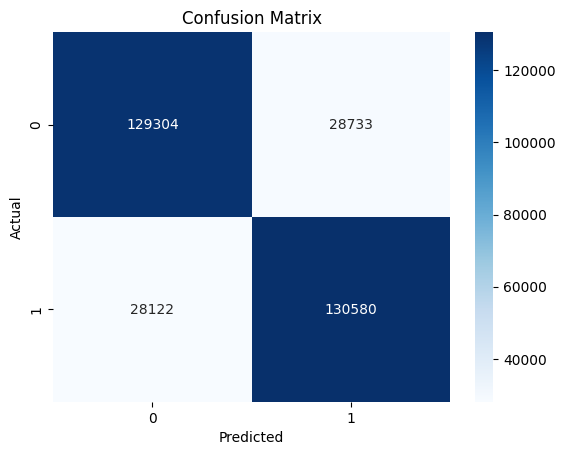

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

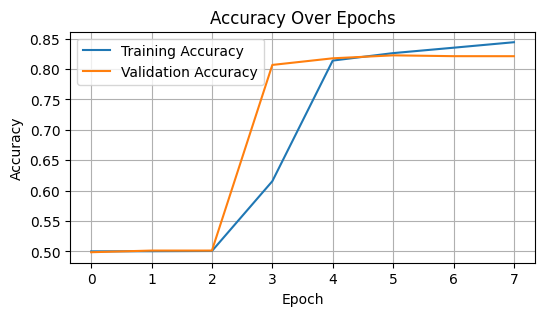

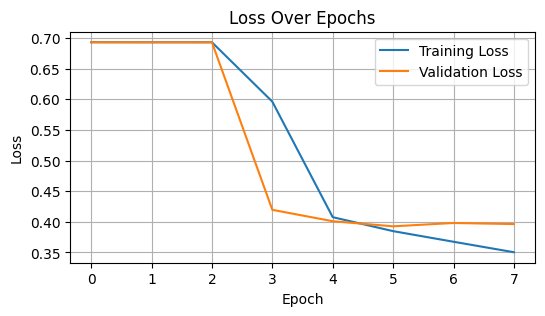

In [57]:

# Accuracy Curve
plt.figure(figsize=(6,3))
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curve
plt.figure(figsize=(6, 3))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Top graph :

Accuracy increases quickly after 2 epochs.

Both training and validation accuracy reach around 82–84%, and then stay stable.

This means the model is learning well and generalizing properly — no overfitting seen here.

## Bottom graph

Loss starts high (~0.68), then drops quickly after 2 epochs.

Both training and validation loss stabilize and stay close together.

This is a good sign — the model is fitting well and not overfitting.

model is doing well.

After 2–3 epochs, it learns fast, improves accuracy, reduces loss, and both training and validation scores stay close — which means it's not overfitting or underfitting.


# choose best model:

## Both models performed well, but the LSTM model was selected as the final model due to:

## Validation Loss consistently decreased during training → suggests better generalization.

## Less overfitting than CNN, which showed increasing validation loss after some epochs.

## Performance was similar to CNN in terms of accuracy, but LSTM had more stable training dynamics.



# **Step  : Save the model and tokenizer**

In [66]:
lstm_model.save("lstm_sentiment_model.keras")
print(" Model saved as 'lstm_sentiment_model.keras'")

 Model saved as 'lstm_sentiment_model.keras'


In [67]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

 Final LSTM model saved as: lstm_sentiment_model.keras

Used for predictions on new, unseen tweets.



In [69]:
from tensorflow.keras.models import load_model
import pickle

# Load the trained LSTM model
model = load_model("lstm_sentiment_model.keras")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [70]:
def preprocess_text(texts, tokenizer, MAX_LEN):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')
    return padded

In [72]:
#Example unseen tweets
new_texts = [
    "I love the product! Amazing quality!",
    "Worst customer experience ever.",
    "Not bad, could be better."
]

In [73]:
MAX_LEN = 50  # or whatever you used during training
X_new = preprocess_text(new_texts, tokenizer, MAX_LEN)

In [75]:
pred_probs = model.predict(X_new)
pred_labels = (pred_probs > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


In [76]:
for text, label in zip(new_texts, pred_labels):
    sentiment = "Positive" if label[0] == 1 else "Negative"
    print(f"Text: {text} \nPredicted Sentiment: {sentiment}\n")

Text: I love the product! Amazing quality! 
Predicted Sentiment: Positive

Text: Worst customer experience ever. 
Predicted Sentiment: Negative

Text: Not bad, could be better. 
Predicted Sentiment: Positive

